In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# add h4d proj root to sys.path so we can import stuff that's in h4d_main/h4d:
# Example: suppose you want to import something from <h4d_main>/h4d/h4d/submodule/:
# "import h4d.submodule" or "from h4d.submodule import foo"
import os, sys, subprocess
from pathlib import Path
_root_dir = Path(subprocess.check_output(['git','rev-parse','--show-toplevel']).strip().decode("utf-8"))
os.chdir(_root_dir)
sys.path.append(str(_root_dir / "centernet-master/src"))
import _init_paths

libPath:  /home/mike/h4d/centernet-master/src/lib


## Imports

In [3]:
import os
from lib.opts import opts
import numpy as np
import matplotlib.pyplot as plt
import torch

from lib.datasets.dataset_factory import get_dataset

import argparse



parser = argparse.ArgumentParser()

arguments = 'ctdet \
    --exp_id centernet-inspector \
    --dataset xview \
    --input_res 512 \
    --batch_size 1'.split()

args = opts().parse(arguments)

dataset = get_dataset(args.dataset,args.task)

args = opts().update_dataset_info_and_set_heads(args, dataset)


Fix size testing.
training chunk_sizes: [1]
The output will be saved to  /home/mike/h4d/centernet-master/src/lib/../../exp/ctdet/centernet-inspector
heads {'hm': 35, 'wh': 2, 'reg': 2}


In [4]:

train_loader = torch.utils.data.DataLoader(
    dataset(args, 'train'),
    batch_size=args.batch_size, 
    shuffle=True,
    num_workers=args.num_workers,
    pin_memory=True,
    drop_last=True
    )

==> initializing xview train data.
loading annotations into memory...
Done (t=1.48s)
creating index...
index created!
Loaded train 19631 samples


In [6]:
len(train_loader)

4907

In [5]:
def show_image_batch(img_tensor, views, title=None):
    num = img_tensor.shape[0]
    fig = plt.figure()
    for i in range(num):
        ax = fig.add_subplot(views, num/views, i+1)
        img = img_tensor[i,:,:,:].numpy().transpose([1,2,0])
        img = ((img * dataset.std + dataset.mean) * 254).astype(np.uint8)
        ax.imshow(img)
        #ax.set_title(title[i])

    plt.show()

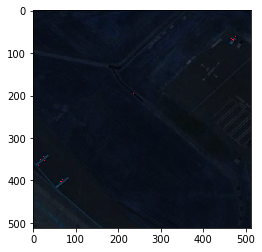

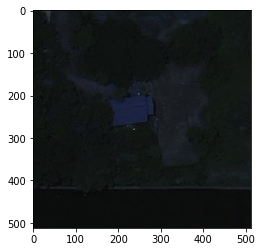

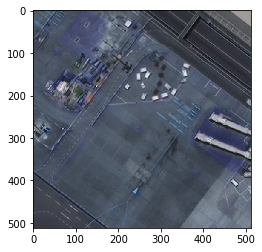

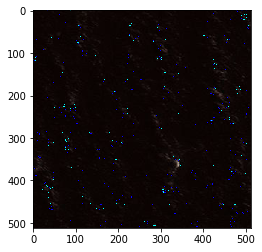

In [6]:
img_tensor = None
boxes = None

for iter_id,batch in enumerate(train_loader):
    if iter_id < 4:
        img_tensor = batch['input']
        boxes = batch['']
        show_image_batch(batch['input'],1)
    else:
        break

   


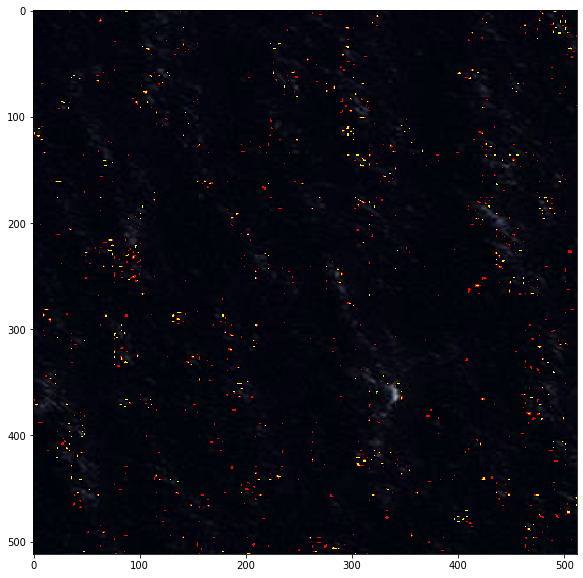

In [7]:
from lib.utils.debugger import Debugger

debug = Debugger(ipynb=True, num_classes=35)

img = img_tensor[0,:,:,:].numpy().transpose([1,2,0])
img = ((img * dataset.std + dataset.mean) * 254).astype(np.uint8)

debug.add_img(img)
debug.add_ct_detection(img)

debug.show_all_imgs()




## Configure Options:

In [ ]:
opt = opts().init(args = "ctdet --exp_id coco_dla_1x".split())
opt.demo = list(map(str, demo_image_paths))
opt.debug = 3
opt.load_model = Path("./centernet-master/exp/ctdet/coco_dla_1x/model_best.pth").resolve()
print("\nOptions:")
show_options(opt)

## Run Detection:

In [ ]:
demo(opt)